# Multi Armed Bandit Problem

The detailed explanation of this problem can been seen in the charpter 2 of [Reinforcement Learning: An Introduction (2nd edition)](http://incompleteideas.net/book/the-book-2nd.html).

## Some definitions about variables 

### Action-value Methods
Expected reward of selecting $\textbf{a}$ as the action:   
$$q_*(a)=E[R_t\mid A_t=a]$$    
The value of action $\textbf{a}$ in the step t:    
$$Q_t(a)=\frac{\sum_{i=1}^{t-1}{R_iI_{A_i=a}}}{\sum_{i=1}^{t-1}{I_{A_i=a}}}=\frac{\text{sum of the rewards when taken $\textbf{a}$ prior to t}}{\text{sum of times taken $\textbf{a}$ prior to t}}$$     
$$\begin{equation}
I_{A_i=a}=\begin{cases}
1,&\text{if taken $\textbf{a}$ in step i} \cr 0,&\text{else}
\end{cases}
\end{equation}$$


### $\epsilon$-Greedy Action Selection
We want to maximize the $Q_t(a)$ because when step t goes to infinity, the value of action $\textbf{a}$ will be close to the expexted reward.    
Greedy action selection:
$$A_t=A_t^*=\underset{a}{argmax{Q_t(a)}}$$
$\epsilon$-Greedy Action Selection:   
$$\begin{equation}
A_{t}=\begin{cases}
A_t^*,&\text{with probability $1-\epsilon$} \\ \text{random action},&\epsilon
\end{cases}
\end{equation}$$



### 10-Armed Bandit Testbed
We set the environment and the agent for this test.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import rl_class


In [8]:
loop = 100
test_a = rl_class.Agent(0.1)
step = 1000
average_reward=np.zeros(step)
optimal_action=np.zeros(step)
for i in range(loop):
    average_reward_1 = []
    optimal_action_1 = []
    test_a.agent_reset()
    while test_a.step < step:
        test_a.update_state()
        test_a.take_action()
        average_reward_1=np.append(average_reward_1, test_a.get_average_reward())
        optimal_action_1=np.append(optimal_action_1, test_a.get_optimal_action())
    average_reward += np.array(average_reward_1)
    optimal_action += np.array(optimal_action_1)
average_reward /= loop
optimal_action /= loop

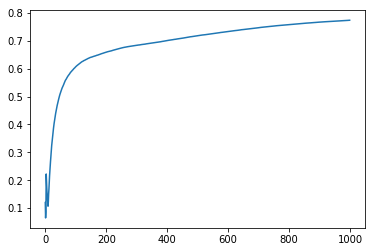

In [9]:
plt.plot(np.arange(step),optimal_action)